# Trend długoterminowy

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

In [106]:
df = pd.read_csv('./Projekt2021/spx500.csv', sep=',', parse_dates=True, index_col='Data')

df.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
1789-05-01,0.51,0.51,0.51,0.51,NaN
1789-06-01,0.51,0.51,0.51,0.51,NaN
1789-07-01,0.50,0.50,0.50,0.50,NaN
1789-08-01,0.50,0.51,0.50,0.51,NaN
1789-09-01,0.51,0.51,0.50,0.51,NaN


In [127]:
df.index

DatetimeIndex(['1789-05-01', '1789-06-01', '1789-07-01', '1789-08-01',
               '1789-09-01', '1789-10-01', '1789-11-01', '1789-12-01',
               '1790-01-01', '1790-02-01',
               ...
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-06-01', '2021-06-02', '2021-06-03',
               '2021-06-04', '2021-06-07'],
              dtype='datetime64[ns]', name='Data', length=38457, freq=None)

In [107]:
# Zmniejszamy zakres danych dla rocznego interwału
d = (datetime.today() - timedelta(days=365*2)).strftime('%Y-%d-%m')
df1 = df.loc[d:]
df1

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2019-12-06,3134.62,3150.60,3134.62,3145.91,1.933044e+09
2019-12-09,3141.86,3148.87,3135.46,3135.96,1.858883e+09
2019-12-10,3135.36,3142.12,3126.09,3132.52,1.857661e+09
2019-12-11,3135.75,3143.98,3133.21,3141.63,1.806967e+09
2019-12-12,3141.23,3176.28,3138.47,3168.57,2.217050e+09
2019-12-13,3166.65,3182.68,3156.51,3168.80,2.076039e+09
2019-12-16,3183.63,3197.71,3183.63,3191.45,2.250994e+09
2019-12-17,3195.40,3198.22,3191.03,3192.52,2.131967e+09
2019-12-18,3195.21,3198.48,3191.14,3191.14,2.230044e+09


In [108]:
df1.index=df1.index.map(mdates.date2num)
df1.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
18236.0,3134.62,3150.60,3134.62,3145.91,1.933044e+09
18239.0,3141.86,3148.87,3135.46,3135.96,1.858883e+09
18240.0,3135.36,3142.12,3126.09,3132.52,1.857661e+09
18241.0,3135.75,3143.98,3133.21,3141.63,1.806967e+09
18242.0,3141.23,3176.28,3138.47,3168.57,2.217050e+09


In [109]:
# Sprawdzamy czy pierwsze wystąpiło max_v czy min_v
# Jeśli 1 jest min_v - trend wzrostowy
# Jeśli 1 jest max_v - trend spatkowy
Min_pozycja = df1['Najnizszy'].argmin()
Max_pozycja = df1['Najwyzszy'].argmax()
if Min_pozycja > Max_pozycja:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
else:
    print(f'Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Min_pozycja}')

Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 72


In [110]:
Max_idx = df1.iloc[Max_pozycja].name
Max_idx

18754.0

In [111]:
#Pozycja Najniższej wartościw w indeksie
Ax = df1.iloc[Min_pozycja].name
Ax

18344.0

In [112]:
Ay = df1['Najnizszy'].loc[Ax]
Ay

2191.86

In [113]:
pd.set_option('display.max_rows', df1.shape[0]+1)

In [114]:
df1

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
18236.0,3134.62,3150.60,3134.62,3145.91,1.933044e+09
18239.0,3141.86,3148.87,3135.46,3135.96,1.858883e+09
18240.0,3135.36,3142.12,3126.09,3132.52,1.857661e+09
18241.0,3135.75,3143.98,3133.21,3141.63,1.806967e+09
18242.0,3141.23,3176.28,3138.47,3168.57,2.217050e+09
18243.0,3166.65,3182.68,3156.51,3168.80,2.076039e+09
18246.0,3183.63,3197.71,3183.63,3191.45,2.250994e+09
18247.0,3195.40,3198.22,3191.03,3192.52,2.131967e+09
18248.0,3195.21,3198.48,3191.14,3191.14,2.230044e+09
18249.0,3192.32,3205.48,3192.32,3205.37,2.066917e+09


In [116]:
A = [Ax, Ay]
A

[18344.0, 2191.86]

In [117]:
df2 = df1[:Max_idx]
while len(df2)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df2.index, y=df2['Najnizszy'])
    df2 = df2.loc[df2['Najnizszy'] < slope * df2.index + intercept]
    
Bx = df2.index.min()
By = df2['Najnizszy'].loc[Bx]
B = [Bx, By]
B

[18690.0, 3723.34]

In [118]:
a = (Ay-By)/(Ax-Bx)
a

4.426242774566474

In [119]:
b = By - a*Bx
b

-79003.13745664741

In [120]:
# Dzięki temu, że znamy równanie prostej możemy podstawić ostatni analizowany dzień do wzoru funkcji i wyliczyć pozycję y
# Robię tak, dlatego, żeby prosta nie kończyła się na punkcie B tylko szła do końca badanego okresu

In [121]:
# Dodaje 10 dni do przodu do wspołrzędnej x ostatniego punktu
Cx = df1.index.max() +10
Cx

18795.0

In [122]:
Cy = a*Cx +b
Cy

4188.09549132947

In [123]:
C = [Cx, Cy]

In [124]:
# Linia trendu o współrzędnych X i Y:
X = [A[0], C[0]]
Y = [A[1], C[1]]

In [125]:
df1.reset_index(inplace=True)

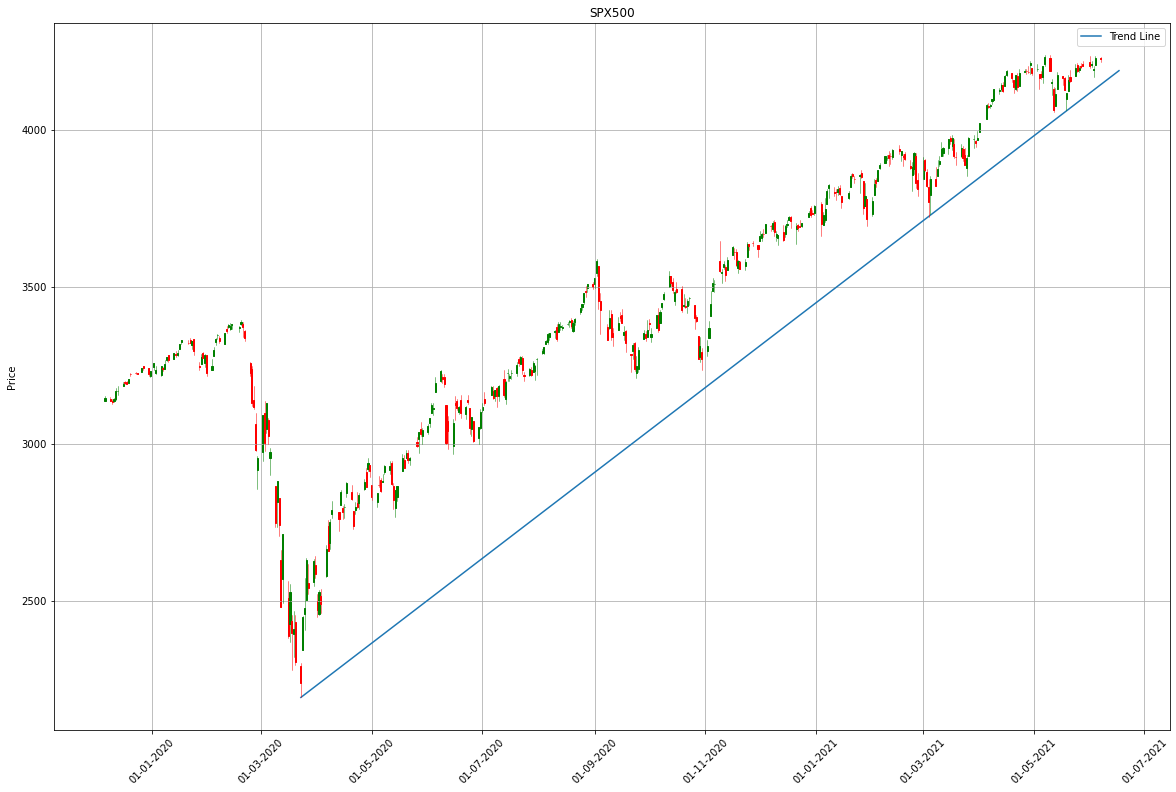

In [126]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X, Y, label='Trend Line')
plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()